<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [27]:
from IPython.display import display
import pandas as pd
import re
import plotly.express as px
import plotly.graph_objs as pg
import numpy as np


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [28]:
# import plotly.io as pio
# pio.renderers.default = "svg"

df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [29]:
df.head()

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

4. Обратите внимание на информацию о числе непустых значений

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [31]:
df_desc1 = df.describe()
df_desc = {}
for col in df.columns:
    top_freq = df[col].value_counts(normalize=True).max()
    nunique_ratio = df[col].nunique() / df[col].count()
    df_desc[col] = {
        'Кол-во': df_desc1[col]['count'],
        'Уникальных значений': df_desc1[col]['unique'],
        'Уникальных значений, %': f'{round(nunique_ratio*100, 2)}',
        'Одинаковых значений, %': f'{round(top_freq*100, 2)}',
        'Самое частое значение': df_desc1[col]['top'],
        'Кол-во самого частого значения': df_desc1[col]['freq']
    }

display(pd.DataFrame(df_desc).transpose())

Кол-во Уникальных значений  \
Пол, возраст                     44744               16003   
ЗП                               44744                 690   
Ищет работу на должность:        44744               14929   
Город, переезд, командировки     44744               10063   
Занятость                        44744                  38   
График                           44744                  47   
Опыт работы                      44576               44413   
Последнее/нынешнее место работы  44743               30214   
Последняя/нынешняя должность     44742               16927   
Образование и ВУЗ                44744               40148   
Обновление резюме                44744               18838   
Авто                             44744                   2   

                                Уникальных значений, % Одинаковых значений, %  \
Пол, возраст                                     35.77                   0.04   
ЗП                                                1.54                   9.08   
Ищет работу на должность:                        33.37                   6.93   
Город, переезд, командировки                     22.49                   2.82   
Занятость                                         0.08                  67.11   
График                                            0.11                  50.79   
Опыт работы                                      99.63                   0.01   
Последнее/нынешнее место работы                  67.53                   2.09   
Последняя/нынешняя должность                     37.83                   4.61   
Образование и ВУЗ                                89.73                   0.01   
Обновление резюме                                 42.1                   0.06   
Авто                                               0.0                  72.12   

                                                             Самое частое значение  \
Пол, возраст                         Мужчина ,  32 года , родился 17 сентября 1986   
ЗП                                                                      50000 руб.   
Ищет работу на должность:                                  Системный администратор   
Город, переезд, командировки     Москва , не готов к переезду , не готов к кома...   
Занятость                                                         полная занятость   
График                                                                 полный день   
Опыт работы                      Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
Последнее/нынешнее место работы  Индивидуальное предпринимательство / частная п...   
Последняя/нынешняя должность                               Системный администратор   
Образование и ВУЗ                Высшее образование 1987 Военный инженерный Кра...   
Обновление резюме                                                 07.05.2019 09:50   
Авто                                                                    Не указано   

                                Кол-во самого частого значения  
Пол, возраст                                                18  
ЗП                                                        4064  
Ищет работу на должность:                                 3099  
Город, переезд, командировки                              1261  
Занятость                                                30026  
График                                                   22727  
Опыт работы                                                  3  
Последнее/нынешнее место работы                            935  
Последняя/нынешняя должность                              2062  
Образование и ВУЗ                                            4  
Обновление резюме                                           25  
Авто                                                     32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [32]:
def education_transformer(v: str) -> str:
    for level in ['высшее', 'неоконченное высшее', 'среднее специальное', 'среднее']:
        if v.lower().startswith(level):
            return level
    return np.nan

df['Образование'] = df['Образование и ВУЗ'].apply(func=education_transformer)
# display(df[df['Образование'].isnull()].head()) # Проверить все ли категории нашли
print(f"Cредний уровень образования имеют {df[df['Образование'] == 'среднее'].shape[0]} соискателей." )
df.drop('Образование и ВУЗ', axis=1, inplace=True)
display(df.head())

Cредний уровень образования имеют 559 соискателей.


Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                               Кассир-операционист  16.04.2019 08:35   
3                               Инженер-программист  08.04.2019 14:23   
4                              Менеджер по продажам  22.04.2019 10:32   

                             Авто          Образование  
0  Имеется собственный автомобиль  неоконченное высшее  
1                      Не указано               высшее  
2                      Не указано  среднее специальное  
3                      Не указано               высшее  
4                      Не указано               высшее

2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [33]:
template = '([?М|Ж])(.*) , (.*) (.*) , (.*)'
df['Пол'] = df['Пол, возраст'].apply(func=lambda x: re.search(template, x).group(1))
df['Возраст'] = df['Пол, возраст'].apply(func=lambda x: int(re.search(template, x).group(3)))
# display(df[['Пол', 'Bозраст']])
# display(df[df['Возраст'].isnull()])
print(f"{round(df['Пол'].value_counts(normalize=True)['Ж'] * 100, 2)} процентов женских резюме представлено в наших данных.")
print(f"{round(df['Возраст'].mean(), 1)} - средний возраст соискателей.")
df.drop('Пол, возраст', axis=1, inplace=True)
display(df.head())

19.07 процентов женских резюме представлено в наших данных.
32.2 - средний возраст соискателей.


ЗП                          Ищет работу на должность:  \
0   29000 руб.                            Системный администратор   
1   40000 руб.                               Технический писатель   
2   20000 руб.                                           Оператор   
3  100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4  140000 руб.                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                               Кассир-операционист  16.04.2019 08:35   
3                               Инженер-программист  08.04.2019 14:23   
4                              Менеджер по продажам  22.04.2019 10:32   

                             Авто          Образование Пол  Возраст  
0  Имеется собственный автомобиль  неоконченное высшее   М       39  
1                      Не указано               высшее   М       60  
2                      Не указано  среднее специальное   Ж       36  
3                      Не указано               высшее   М       38  
4                      Не указано               высшее   Ж       26

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [34]:
def experience_transformer(v):
    if pd.isnull(v):
        return np.nan
    variant1 = re.search(r'^Опыт работы (\d+) (год|года|лет) (\d+) (месяцев|месяца|месяц) {2}(.*)', v)
    if variant1:
        return int(variant1.group(1)) * 12 + int(variant1.group(3))
    variant2 = re.search(r'^Опыт работы (\d+) (месяцев|месяца|месяц) {2}(.*)$', v)
    if variant2:
        return int(variant2.group(1))
    variant3 = re.search(r'^Опыт работы (\d+) (год|года|лет) {2}(.*)$', v)
    if variant3:
        return int(variant3.group(1)) * 12
    if v == 'Не указано':
        return 0
    return -1

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(func=experience_transformer)
# display(df[df['Опыт работы (месяц)'] == -1])
print(f"Медианный опыт работы (в месяцах) равен {round(df['Опыт работы (месяц)'].median())}")
df.drop('Опыт работы', axis=1, inplace=True)
display(df)

Медианный опыт работы (в месяцах) равен 100


ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                            Город, переезд, командировки  \
0      Советск (Калининградская область) , не готов к...   
1      Королев , не готов к переезду , готов к редким...   
2      Тверь , не готова к переезду , не готова к ком...   
3      Саратов , не готов к переезду , готов к редким...   
4      Москва , не готова к переезду , готова к коман...   
...                                                  ...   
44739  Тверь , готов к переезду (Москва, Химки) , гот...   
44740  Липецк , готов к переезду , готов к командировкам   
44741  Челябинск , готова к переезду , готова к редки...   
44742  Тамбов , не готов к переезду , не готов к кома...   
44743  Москва , не готов к переезду , не готов к кома...   

                                               Занятость  \
0      частичная занятость, проектная работа, полная ...   
1      частичная занятость, проектная работа, полная ...   
2                                       полная занятость   
3      частичная занятость, проектная работа, полная ...   
4                                       полная занятость   
...                                                  ...   
44739                                   полная занятость   
44740  проектная работа, частичная занятость, полная ...   
44741                                   полная занятость   
44742              частичная занятость, полная занятость   
44743                                   полная занятость   

                                                  График  \
0      гибкий график, полный день, сменный график, ва...   
1      гибкий график, полный день, сменный график, уд...   
2                                            полный день   
3                        гибкий график, удаленная работа   
4                                            полный день   
...                                                  ...   
44739                      полный день, удаленная работа   
44740  удаленная работа, гибкий график, полный день, ...   
44741                      полный день, удаленная работа   
44742                                   удаленная работа   
44743                                        полный день   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                               OpenSoft   
4                                               Мармелад   
...                                                  ...   
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                           Последняя/нынешняя должность Обновление резюме  \
0                               Системный администратор  16.04.2019 15:59   
1      Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                       

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [35]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]

def city_transformer(v):
    city = v.split(" , ")[0]
    if city in million_cities:
        return 'город миллионник'
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    return 'другие'

def relocation_transformer(v):
    tokens = v.split(" , ")
    value = tokens[1] if ' перее' in tokens[1] else tokens[2]
    return 'не ' not in value.split('(')[0]

def business_trip_transformer(v):
    search = ' командиров'
    tokens = v.split(" , ")
    if len(tokens) > 2 and search in tokens[2]:
        value = tokens[2]
    elif len(tokens) > 3 and search in tokens[3]:
        value = tokens[3]
    else:
        return True
    return 'не ' not in value


df['Город'] = df['Город, переезд, командировки'].apply(func=city_transformer)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(func=relocation_transformer)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(func=business_trip_transformer)
# display(df[df['Готовность к переезду'] == 'Санкт-Петербург'])
# display(df['Готовность к командировкам'].unique())
print(f"{round(df['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)} процентов соискателей живут в Санкт-Петербурге")
print(f"{round(df[df['Готовность к переезду'] & df['Готовность к командировкам']].shape[0]/df.shape[0] * 100)} процентов соискателей готовы одновременно и к переездам, и к командировкам")
df.drop('Город, переезд, командировки', axis=1, inplace=True)
display(df)

11 процентов соискателей живут в Санкт-Петербурге
32 процентов соискателей готовы одновременно и к переездам, и к командировкам


ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                                               Занятость  \
0      частичная занятость, проектная работа, полная ...   
1      частичная занятость, проектная работа, полная ...   
2                                       полная занятость   
3      частичная занятость, проектная работа, полная ...   
4                                       полная занятость   
...                                                  ...   
44739                                   полная занятость   
44740  проектная работа, частичная занятость, полная ...   
44741                                   полная занятость   
44742              частичная занятость, полная занятость   
44743                                   полная занятость   

                                                  График  \
0      гибкий график, полный день, сменный график, ва...   
1      гибкий график, полный день, сменный график, уд...   
2                                            полный день   
3                        гибкий график, удаленная работа   
4                                            полный день   
...                                                  ...   
44739                      полный день, удаленная работа   
44740  удаленная работа, гибкий график, полный день, ...   
44741                      полный день, удаленная работа   
44742                                   удаленная работа   
44743                                        полный день   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                               OpenSoft   
4                                               Мармелад   
...                                                  ...   
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                           Последняя/нынешняя должность Обновление резюме  \
0                               Системный администратор  16.04.2019 15:59   
1      Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                                   Кассир-операционист  16.04.2019 08:35   
3                                   Инженер-программист  08.04.2019 14:23   
4                                  Менеджер по продажам  22.04.2019 10:32   
...                                                 ...               ...   
44739                            Руководитель субгруппы  22.04.2019 12:32   
44740                                   Предприниматель  22.04.2019 13:11   
44741                        Начальник группы аналитики  09.04.2019 05:07   
44742                                 Менеджер проектов  26.04.2019 14:25   
44743         Руководитель отдела технической поддержки  05.07.2018 20:15   

                                 Авто          Обра

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [36]:
mapping = {
    'Занятость': ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка'],
    'График': ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
}
for key in mapping:
    for column in mapping[key]:
        df[column] = df[key].apply(lambda x: column in x)

print(f"{df[df['проектная работа'] & df['волонтерство']].shape[0]} людей ищут проектную работу или волонтёрство")
print(f"{df[df['вахтовый метод'] & df['гибкий график']].shape[0]} людей хотят работать вахтовым методом или с гибким графиком")
# display(df['волонтерство'].unique())
df.drop(['Занятость', 'График'], axis=1, inplace=True)
display(df)

436 людей ищут проектную работу или волонтёрство
2311 людей хотят работать вахтовым методом или с гибким графиком


ЗП                          Ищет работу на должность:  \
0       29000 руб.                            Системный администратор   
1       40000 руб.                               Технический писатель   
2       20000 руб.                                           Оператор   
3      100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4      140000 руб.                  Региональный менеджер по продажам   
...            ...                                                ...   
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                               OpenSoft   
4                                               Мармелад   
...                                                  ...   
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                           Последняя/нынешняя должность Обновление резюме  \
0                               Системный администратор  16.04.2019 15:59   
1      Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                                   Кассир-операционист  16.04.2019 08:35   
3                                   Инженер-программист  08.04.2019 14:23   
4                                  Менеджер по продажам  22.04.2019 10:32   
...                                                 ...               ...   
44739                            Руководитель субгруппы  22.04.2019 12:32   
44740                                   Предприниматель  22.04.2019 13:11   
44741                        Начальник группы аналитики  09.04.2019 05:07   
44742                                 Менеджер проектов  26.04.2019 14:25   
44743         Руководитель отдела технической поддержки  05.07.2018 20:15   

                                 Авто          Образование Пол  Возраст  \
0      Имеется собственный автомобиль  неоконченное высшее   М       39   
1                          Не указано               высшее   М       60   
2                          Не указано  среднее специальное   Ж       36   
3                          Не указано               высшее   М       38   
4                          Не указано               высшее   Ж       26   
...                               ...                  ...  ..      ...   
44739                      Не указано               высшее   М       30   
44740                      Не указано               высшее   М       27   
44741                      Не указано               высшее   Ж       48   
44742  Имеется собственный автомобиль               высшее   М       24   
44743                      Не указано               высшее   М       38   

       Опыт работы (месяц)  ... полная занятость  частичная занятость  \
0                    202.0  ...             True                 True   
1                    233.0  ...             True                 True   
2                    123.0  ...             True                False   
3                    225.0  ...             True                 True   
4                     67.0  ...             True                False   
...                    ...  ...              ...                  ...   
44739                 91.0  ...             True                False   
44740   

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [37]:
er = pd.read_csv('data/ExchangeRates.csv', sep=',')
er.drop(['per', 'time', 'vol'], axis=1, inplace=True)
er['date'] = pd.to_datetime(er['date']).dt.date
cur_mapping = {
    'руб.': 'RUB',
    'бел.руб.': 'BYN',
    'KZT': 'KZT',
    'EUR': 'EUR',
    'USD': 'USD',
    'грн.': 'UAH',
    'сум': 'UZS',
    'KGS': 'KGS',
    'AZN': 'AZN'
}

df['date'] = pd.to_datetime(df['Обновление резюме']).dt.date
df['salary'] = df['ЗП'].apply(lambda x: int(x.split(' ')[0].strip()))
df['currency'] = df['ЗП'].apply(lambda x: cur_mapping[x.split(' ')[1].strip()])

df = df.merge(er, how='left', left_on=['currency','date'], right_on=['currency', 'date'])
df = df.fillna(
    {
        'close': 1,
        'proportion': 1,
    }
)
df['ЗП (руб)'] = round(df['salary'] * df['close'] / df['proportion'], 2)

df.drop(['ЗП', 'salary', 'currency', 'date', 'close', 'proportion'], axis=1, inplace=True)
print(f"{round(df['ЗП (руб)'].median() / 1000)} - медианная заработная плата соискателей в нашей таблице (в рублях) округленная до тысяч.")

display(df)

59 - медианная заработная плата соискателей в нашей таблице (в рублях) округленная до тысяч.


Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2                                               Оператор   
3      Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                      Региональный менеджер по продажам   
...                                                  ...   
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                           ПАО Сбербанк   
3                                               OpenSoft   
4                                               Мармелад   
...                                                  ...   
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                           Последняя/нынешняя должность Обновление резюме  \
0                               Системный администратор  16.04.2019 15:59   
1      Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                                   Кассир-операционист  16.04.2019 08:35   
3                                   Инженер-программист  08.04.2019 14:23   
4                                  Менеджер по продажам  22.04.2019 10:32   
...                                                 ...               ...   
44739                            Руководитель субгруппы  22.04.2019 12:32   
44740                                   Предприниматель  22.04.2019 13:11   
44741                        Начальник группы аналитики  09.04.2019 05:07   
44742                                 Менеджер проектов  26.04.2019 14:25   
44743         Руководитель отдела технической поддержки  05.07.2018 20:15   

                                 Авто          Образование Пол  Возраст  \
0      Имеется собственный автомобиль  неоконченное высшее   М       39   
1                          Не указано               высшее   М       60   
2                          Не указано  среднее специальное   Ж       36   
3                          Не указано               высшее   М       38   
4                          Не указано               высшее   Ж       26   
...                               ...                  ...  ..      ...   
44739                      Не указано               высшее   М       30   
44740                      Не указано               высшее   М       27   
44741                      Не указано               высшее   Ж       48   
44742  Имеется собственный автомобиль               высшее   М       24   
44743                      Не указано               высшее   М       38   

       Опыт работы (месяц)             Город  ...  частичная занятость  \
0                    202.0            другие  ...                 True   
1                    233.0            другие  ...                 True   
2                    123.0            другие  ...                False   
3                    225.0            другие  ...                 True   
4                     67.0            Москва  ...                False   
...                    ...               ...  ...                  ...   
44739                 91.0            другие  ...                False   
44740                 84.0            другие  ...                 True   
44741                257.0  город миллионник  ...                False   
44742                 4

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

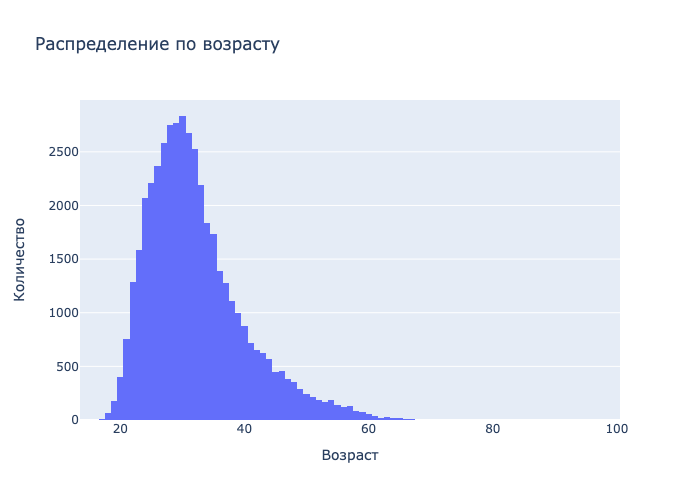

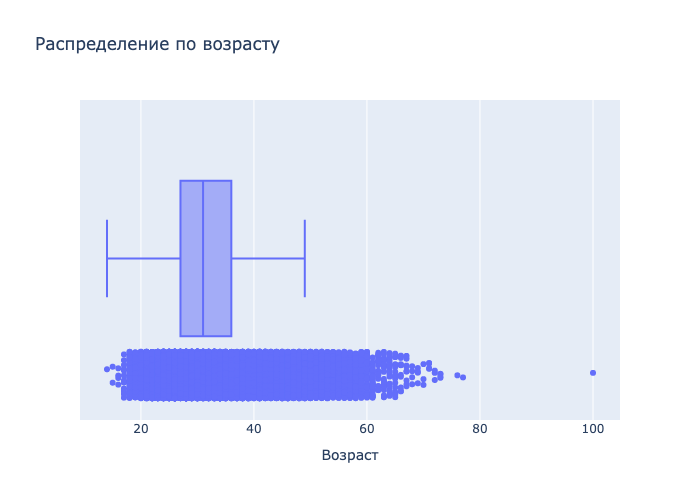

Ищет работу на должность:  \
5597   Специалист или Преподаватель  по разработке  б...   
15419                                          Методолог   
29098                        Ведущий инженер-программист   
31137                     Менеджер по работе с клиентами   
32950                                    Тестировщик игр   
33654                               Frontend-разработчик   

                         Последнее/нынешнее место работы  \
5597                              МАДК им. А А Николаева   
15419  РУТ (МИИТ), институт управления и информационн...   
29098                           КБ Аметист, Концерн АГАТ   
31137                              ООО "ФёрстКэшКомпани"   
32950                                           OOO ЖМЫХ   
33654                                          Freelance   

          Последняя/нынешняя должность Обновление резюме        Авто  \
5597        Разработчик, преподаватель  31.10.2018 12:50  Не указано   
15419  Начальник отдела технологий IBM  26.04.2019 06:45  Не указано   
29098      Ведущий инженер-программист  26.04.2019 09:18  Не указано   
31137   Менеджер по работе с клиентами  06.04.2019 09:13  Не указано   
32950                   Тестировщик ПО  09.04.2019 16:02  Не указано   
33654             Frontend-разработчик  19.04.2019 23:27  Не указано   

               Образование Пол  Возраст  Опыт работы (месяц)            Город  \
5597                высшее   М       77                496.0           Москва   
15419               высшее   М       76                543.0           другие   
29098               высшее   М       14                477.0           Москва   
31137              среднее   М       15                  2.0  Санкт-Петербург   
32950  среднее специальное   М       15                  3.0           другие   
33654  среднее специальное   М      100                 30.0  Санкт-Петербург   

       ...  частичная занятость  проектная работа  волонтерство  стажировка  \
5597   ...                 True             False         False       False   
15419  ...                False             False         False       False   
29098  ...                False             False         False       False   
31137  ...                 True             False         False       False   
32950  ...                False             False         False       False   
33654  ...                 True              True         False        True   

       полный день  сменный график  гибкий график  удаленная работа  \
5597          True            True           True             False   
15419         True           False          False             False   
29098         True           False          False             False   
31137        False            True           True              True   
32950         True           False          False             False   
33654         True           False           True              True   

       вахтовый метод  ЗП (руб)  
5597            False   90000.0  
15419           False   45000.0  
29098           False   60000.0  
31137           False   10000.0  
32950           False    2000.0  
33654           False   60000.0  

[6 rows x 23 columns]

In [38]:
x = 'Возраст'
title = 'Распределение по возрасту'

fig = px.histogram(df, x=x, title=title)
fig.update_layout(yaxis_title="Количество")
fig.show(renderer='png')

fig = px.box(df, x=x, title=title, points="all")
fig.show(renderer='png')

display(df[(df[x] < 16) | (df[x] > 75)])

Распределение по возрасту похоже на нормальное с перекосом в правую сторону.
Мода распределения - 30 лет.
Предельные значения - от 14 до 100 лет. Большинство соискателей, судя по коробчатой диаграмме, имеют возраст примерно от 27 до 36 лет.

Заметна аномалия в районе 100 лет, запись №33654.
Такое очень маловероятно, учитывая что соискатель имеет опыт работы всего 30 месяцев.
C другого конца еще одна аномалия - 14-ти летний соискатель с 477 месяцами опыта, запись №29098.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [39]:
x = 'Опыт работы (месяц)'
title = 'Распределение по опыту работы (в месяцах)'

fig = px.histogram(df, x=x, title=title)
fig.update_layout(yaxis_title="Количество")
fig.show()

fig = px.box(df, x=x, title=title, points="all")
fig.show()

print(f"Мода опыта работы (месяц) - {df[x].mode()}")
display(df[(df[x] > 622) | (df[x]/12 > df['Возраст'])])

Мода опыта работы (месяц) - 0    81.0
dtype: float64


Ищет работу на должность:  \
3293                  Руководитель проектов   
4535                 Технический специалист   
10044  Инженер слаботочных систем  электрик   
19351       Специалист (Junior-программист)   
19872                              Аналитик   
26477                  Менеджер IT-проектов   
29098           Ведущий инженер-программист   
40015       Системный администратор Windows   
43451        Руководитель отдела разработки   

                         Последнее/нынешнее место работы  \
3293                 430 военное представительство МО РФ   
4535                                                   а   
10044                                       ТЭК СПб, ГУП   
19351                                  Русский свет, ООО   
19872                                           Kyivstar   
26477  М©й IT'M  ("Информационные Технологии' Менеджм...   
29098                           КБ Аметист, Концерн АГАТ   
40015                                     АО ТК Горизонт   
43451                                              ЛАНИТ   

                     Последняя/нынешняя должность Обновление резюме  \
3293                  Специалист первой категории  26.04.2019 13:51   
4535                                            а  11.04.2019 10:46   
10044                                     Инженер  20.04.2019 09:46   
19351                                    Электрик  26.04.2019 11:07   
19872            Фахівець з опису бізнес процесів  26.04.2019 14:10   
26477                                  Основатель  08.04.2019 01:01   
29098                 Ведущий инженер-программист  26.04.2019 09:18   
40015  Начальник отдела информационных технологий  16.04.2019 08:09   
43451                        Руководитель проекта  17.08.2018 12:15   

                                 Авто          Образование Пол  Возраст  \
3293   Имеется собственный автомобиль               высшее   М       73   
4535                       Не указано  среднее специальное   Ж       18   
10044  Имеется собственный автомобиль               высшее   М       71   
19351                      Не указано               высшее   М       28   
19872                      Не указано               высшее   М       34   
26477                      Не указано               высшее   М       34   
29098                      Не указано               высшее   М       14   
40015                      Не указано               высшее   М       48   
43451                      Не указано               высшее   М       36   

       Опыт работы (месяц)             Город  ...  частичная занятость  \
3293                 663.0            Москва  ...                False   
4535                 271.0            другие  ...                 True   
10044                653.0   Санкт-Петербург  ...                 True   
19351                470.0            другие  ...                False   
19872                416.0            другие  ...                False   
26477                411.0   Санкт-Петербург  ...                 True   
29098                477.0            Москва  ...                False   
40015               1188.0  город миллионник  ...                 True   
43451                434.0            Москва  ...                False   

       проектная работа  волонтерство  стажировка  полный день  \
3293              False         False       False         True   
4535               True         False       False        False   
10044             False         False       False         True   
19351             False         False       False         True   
19872             False         False       False         True   
26477              True          True        True         True   
29098             False         False       False         True   
40015             False         False       False         True   
43451             False         False       False         True   

       сменный график  гибкий график  удаленная работа  вахтовый метод  \
3293    

Мода опыта работы (месяц) - 81.
Предельные значения от 0 до 1188 месяцев. Большинство кандидатов имеют опыт от 57 до 154 месяцев.
Заметна аномалия в 1198 месяцев, запись №40015.
Она наводит на мысль поиска остальных записей, где опыт работы превосходит возраст соискателя.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [40]:
x = 'ЗП (руб)'
title = 'Распределение по опыту работы (в месяцах)'

adjusted_df = df[df[x] <= 1_000_000]

fig = px.histogram(adjusted_df, x=x, title=title)
fig.update_layout(yaxis_title="Количество")
fig.show()

fig = px.box(df, x=x, title=title, points="all")
fig.show()

print(f"Мода зарплаты (руб) - {df[x].mode()}")
display(df[(df[x] > 1_000_000) ])

Мода зарплаты (руб) - 0    50000.0
dtype: float64


Ищет работу на должность:  \
6931   Программирование, Разработка или Системный адм...   
28253  Руководитель IT проектов, Роботизация, Автомат...   
39191                                   Специалист по IT   
41924                                    Project manager   
43134                                   Chief AI Officer   

                         Последнее/нынешнее место работы  \
6931                                Евразийский банк, АО   
28253                                   HAMSTER ROBOTICS   
39191                                          ТОО "AMS"   
41924                                      Тинькофф Банк   
43134  Finnish Russian Univeristy Cooperation in Tele...   

                            Последняя/нынешняя должность Обновление резюме  \
6931   Главный специалист Отдел разработки систем роз...  22.04.2019 14:09   
28253                              Заместитель директора  27.04.2019 09:41   
39191                            Системный администратор  22.04.2019 15:21   
41924            Технолог автоматизации бизнес-процессов  22.04.2019 18:48   
43134         Project Manager in Multimedia Technologies  25.10.2018 02:49   

                                 Авто          Образование Пол  Возраст  \
6931                       Не указано               высшее   М       31   
28253  Имеется собственный автомобиль               высшее   М       39   
39191                      Не указано  среднее специальное   М       29   
41924                      Не указано  неоконченное высшее   М       24   
43134                      Не указано               высшее   М       38   

       Опыт работы (месяц)   Город  ...  частичная занятость  \
6931                 115.0  другие  ...                 True   
28253                280.0  Москва  ...                 True   
39191                 98.0  другие  ...                False   
41924                 39.0  Москва  ...                 True   
43134                 97.0  Москва  ...                False   

       проектная работа  волонтерство  стажировка  полный день  \
6931               True         False       False         True   
28253              True         False       False         True   
39191             False         False       False         True   
41924              True         False       False         True   
43134             False         False       False         True   

       сменный график  гибкий график  удаленная работа  вахтовый метод  \
6931             True           True              True           False   
28253           False           True              True            True   
39191           False          False             False           False   
41924           False           True              True           False   
43134           False          False             False           False   

         ЗП (руб)  
6931   24304876.0  
28253   3000000.0  
39191   7675224.0  
41924   1750000.0  
43134   2500000.0  

[5 rows x 23 columns]

Модальное значение желаемой зарплаты - 50 тысяч рублей.
Предельные значения от 1 до 24304876 рублей. Большинство значений желаемой зарплаты лежат в промежутке между 37 и 95 тысяч рублей.
Мы наблюдаем 5 соискателей с желаемой зарплатой больше 1 миллиона рублей.
Для показа диаграмм заказчику, нужно убирать крайние значения т.к. требуемые зарплаты похоже являются ошибкой ввода.
Причина может быть либо в дополнительном нуле введенным по ошибке или ошибочно введенной валюте зарплаты.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [41]:
data = adjusted_df.groupby('Образование', as_index=False)['ЗП (руб)'].median()
fig = px.bar(data, x='Образование', y='ЗП (руб)', title='Зависимость медианной желаемой зарплаты от образования')
fig.show()

Наибольшее значение желаемой зарплаты мы видим у соискателей с высшим образованием и наименьшее у соискателей со средним.
По диаграмме видно, что желаемая зарплата почти линейно зависит уровня образования.
Что безусловно важно для прогнозирования заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [42]:
data = adjusted_df.groupby('Город', as_index=False)['ЗП (руб)'].median()
fig = px.bar(data, x='Город', y='ЗП (руб)', title='Зависимость желаемой зарплаты от города')
fig.show()

# display(df[df['ЗП (руб)'] > 923_000])

Желаемая зарплата в Москве более чем в 2 раза больше, чем в прочих городах России за исключением Санкт-Петербурга.
В Санкт-Петербурге зарплата в 1.5 раза больше, чем других городах за исключением Москвы.
Очевидно что признак города очень важен для прогнозирования.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [43]:
data = df.copy()
data = data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median().sort_values(by='ЗП (руб)')

fig = px.bar(data, x='Готовность к переезду', color='Готовность к командировкам', y='ЗП (руб)', title='Зависимость медианной желаемой зарплаты от признаков «Готовность к переезду» и «Готовность к командировкам»')
fig.show()


Диаграмма подтверждает ожидание, что соискатели с большей гибкостью к переездам ожидают получать большую зарплату.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [44]:
pivot = df.pivot_table(values='ЗП (руб)', index='Образование', columns='Возраст', aggfunc='median')
fig = px.imshow(pivot, title='Зависимость желаемой зарплаты от возраста и образования',
    color_continuous_scale=px.colors.diverging.Tealrose
)
fig.update_yaxes(autorange=True)
fig.show()

Сразу бросается в глаза
* Выбросы после 89 лет с нашим 100 летним соискателем и с соискателями моложе 20-ти лет имеющих высшие образование.
* Соискатели с высшим образование добиваются высоких зарплат быстрее
* Желаемая зарплата растёт с возрастом

4. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [45]:
data = df.copy()
data['Опыт работы (лет)'] = data['Опыт работы (месяц)'].apply(func=lambda z: np.nan if pd.isnull(z) else round(z / 12, 1))
fig = px.scatter(data, y='Опыт работы (лет)', x='Возраст', title='Зависимость Опыта работы от Возраста соискателей')
fig.add_trace(pg.Scatter(x=[0,100], y=[0,100], mode='lines'))
fig.update_layout(yaxis_range=[0,100], xaxis_range=[0,100], showlegend=False)
fig.show()

На диаграмме зависимости опыта работы от возраста стали очевидными несколько аномалий.
* 100 летний соискатель без опыта
* Несколько соискателей имеют опыта больше, чем их возраст
* И несколько соискателей почти на линии Опыт = Возраст, что означает начало опыта работы с дошкольного возраста.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [46]:
filtered_df = df[df['Возраст'] < 76]
pivot = filtered_df.pivot_table(values='ЗП (руб)', index='Пол', columns='Возраст', aggfunc='median')
fig = px.imshow(pivot, title='Зависимость желаемой зарплаты от возраста и пола',
                color_continuous_scale=px.colors.diverging.Tealrose
                )
fig.update_yaxes(autorange=True)
fig.show()

filtered_df = filtered_df.copy()
filtered_df['Готовность к командировкам, %'] = filtered_df['Готовность к командировкам'].apply(func=lambda z: 100 if z else 0)
data = filtered_df.groupby('Возраст', as_index=False)['Готовность к командировкам, %'].mean()
fig = px.bar(data, x='Возраст', y='Готовность к командировкам, %',
    title='Показатель готовности к командировкам, % от возраста')
fig.show()


Первая диаграмма показывает зависимость зарплаты от поля и возраста.
* Как можно видеть в наш век мужчины все еще получают существенно больше чем женщины
* Женщины начинают работать с 17 лет, на пару лет позже чем мужчины и уходят на пенсию раньше

Вторая диаграммы показывает показатель готовности к командировкам, % от возраста
* Соискатели больше всего готовы к командировкам в возрасте 25-60 лет
* До 25 лет соискатели похоже не готовы к командировкам из-за школы/учебы
* А после 60 лет, ездить уже становится неудобно (здоровье уже не то и желание повидать новые места меньше)

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [47]:
cleaned_df = df.copy()
cleaned_df['Обновление резюме'] = pd.to_datetime(cleaned_df['Обновление резюме']).dt.date
display(cleaned_df.duplicated().sum())
cleaned_df.drop_duplicates(inplace=True)
display(cleaned_df.shape[0])

161

44583

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [48]:
for col in cleaned_df.columns:
    nan_count = cleaned_df[col].isnull().sum()
    if nan_count > 0:
        print(f"'{col}' столбец имеет {nan_count} nan значений")

'Последнее/нынешнее место работы' столбец имеет 1 nan значений
'Последняя/нынешняя должность' столбец имеет 2 nan значений
'Опыт работы (месяц)' столбец имеет 166 nan значений


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [49]:
cleaned_df.dropna(
    axis='index',
    subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'],
    how='any',
    inplace=True
)
cleaned_df['Опыт работы (месяц)'].fillna(cleaned_df['Опыт работы (месяц)'].median(), inplace=True)

print(cleaned_df['Опыт работы (месяц)'].mean())

114.35328951795609


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [50]:
to_be_removed = cleaned_df[(cleaned_df['ЗП (руб)'] < 1_000) | (cleaned_df['ЗП (руб)'] > 1_000_000)].index
print(len(to_be_removed))
cleaned_df.drop(to_be_removed, axis='index', inplace=True)

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [51]:
to_be_removed = cleaned_df[cleaned_df['Опыт работы (месяц)'] > 12 * cleaned_df['Возраст']].index
print(len(to_be_removed))
cleaned_df.drop(to_be_removed, axis='index', inplace=True)

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

In [52]:
def outliers_z_score_mod(mdf, feature, log_scale=False, left=3, right=3):
    if log_scale:
        z = np.log(mdf[feature])
    else:
        z = mdf[feature]
    mu = z.mean()
    sigma = z.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outer = mdf[(z < lower_bound) | (z > upper_bound)]
    inner = mdf[(z > lower_bound) & (z < upper_bound)]
    return outer, inner

outliers, cleaned = outliers_z_score_mod(cleaned_df, 'Возраст', log_scale=True, left=3, right=4)
print('outliers:', outliers.shape[0])
# outliers: 3
print('cleaned:', cleaned.shape[0])
# cleaned: 44482

fig = px.histogram(np.log(cleaned_df['Возраст']), title='Логарифмическое распределение по возрасту')
fig.update_layout(yaxis_title="Количество", xaxis_title='Возраст (логарифм)', showlegend=False)
fig.show()

outliers: 3
cleaned: 44482
